SLAMming with Spheros
=====

##### IPython Notebook

The complete GitHub repository is available at [Coverage](https://github.com/srinivaskandasamy/Coverage/tree/master/marchw3)

Weekly Report
====
***

Monday, March $16^{th}$, 2015
----

### Meeting with Tamas

1. Housing for Spheros
   - Cannot open the new drawer
   - To be replaced with a working one
2. New version of the progress or coverage report looks better
3. Conic estimation techniques
   - Find out the possibilities of a conic probability distribution (less importance)
   - Low dimensional approximation of distribution at the expense of direct incorporation of constraints
   - Need to check the suitability of above from a corridor to a maze
4. Installation of new video card to the new GPU machine (TUD0035314)
   - Reference from Mazo
   - GPU coding primer from Mazo (on CUDA)
5. ETHZ Application to wait for few more days 

### Sphero trajectory creation

1. Created a sample robot trajectory that has been sampled from a notmal gaussian over the inelastic collision angles
2. Inelastic collision angles converted to variation in consecutive collision width

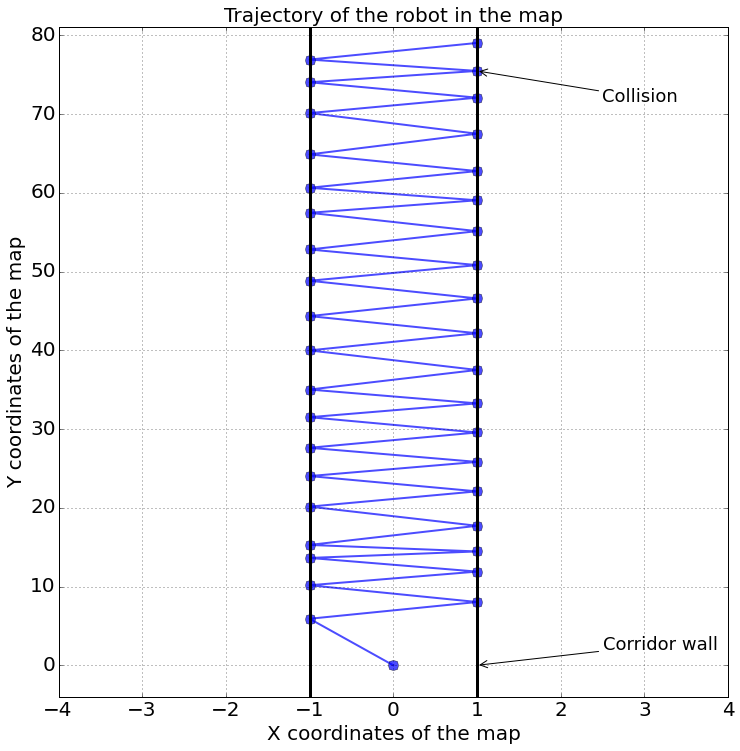

In [3]:
# Python code for inelastic collision trajectory in a corridor
%run corridor_trajectory.ipynb

Tuesday, March $17^{th}$, 2015
----

### Difficulties related to impact-SLAM

1. Particle filter-SLAM cannot be used due to the curse of dimensionality. However, the structure has been exploited to the most to reduce the growth of complexity in the system as in the literature. As in the state-of-the-art version of particle filter-SLAM, the localization problem was taken care by the Monte Carlo filters while the mapping problem was solved using EKF/UKF.
2. In the case of impact based-SLAM, the presence of hard constraints makes it hard to approximate the probability density as a Gaussian. 
3. The estimators that comes to mind when hard constraints are present are particle filter and histogram filter, which can represent arbitrary distributions.
4. The problem of localization in the existing particle filter-SLAM can be taken to be solved due to the arbitrary representation from Monte Carlo filters. Still mapping assumes the uncertainty as Gaussian. 
5. This leaves me back to the starting point of the problem - How to do impact-based online SLAM?

### Corridor Mapping
1. A suitable representation of the corridor
   - Line representation in polar form (suffers from nonlinear transformation for parallel corridors - can be solved using unscented transform) 
   - Indistinct landmark representation, that is not suitable for EKF/UKF-SLAM
   - Discontinuous line representation (looks novel)
       - Most suitable for impact based representation
       - Suitable for planning to actively avoid the hypotheses
       - a maximum likelihood approach to avoid curse of dimensionality in finding and eliminating active hypotheses (consider the use of width of corridor to remove the blow-up in hypothese tree)
       - Suitable for SLAM problem in a maze
   - A SVM approach to map the corridor rather than building the entire corridor, and is more efficient

##### Visibility based-SLAM (Get Tamas' view)
----
> Alternative to the usual SLAM solutions, the visibility vertices are propagated over a 'smooth' Gaussian distribution. The concave vertices can be easily propagated during the navigation techniques while the convex vertices have to be actively propagated through a hypotheses tree. The vertex set can be easily assumed to be a Gaussian except that all the landmarks are correlated strongly due to the rectilinearity and measurements.

> As we discussed in the last meeting over the low dimensional version of estimation techniques, on using the hierarchical prior -corridor width, we reduced the dimension of landmark estimation from 2D to 1D. This can avoid the discontinuous probability distribution over higher dimension (2D). However, as pointed by you about the discontinuity in 1D in the case of robot colliding at the end of the wall, I do think that there exists active techniques to reduce this erroneous hypothesis at the end of a wall to a Gaussian of lower covariance by planning and with the expense of the strong hierarchical prior. 

In [1]:
from IPython.core.display import HTML


def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()